In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:\stark\Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
rows = list(range(100, 150))
data = data.drop(data.index[rows])
datap = data.copy()


In [7]:
datap

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:

rows = list(range(1, 25))
data = data.drop(data.index[rows])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [7]:
rows = list(range(25, 50))
data = data.drop(data.index[rows])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [8]:

rows = list(range(25, 50))
datap = datap.drop(datap.index[rows])
datap

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
rows = list(range(49, 75))
datap = datap.drop(datap.index[rows])
datap

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
datap

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
X = np.column_stack((data['SepalLengthCm'], data['PetalLengthCm']))
y = data['Species']


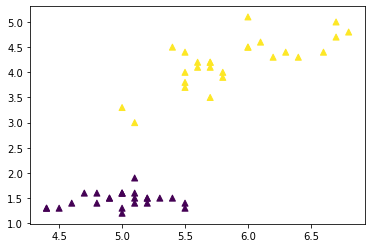

In [11]:
clf = svm.SVC(kernel = 'linear', C = 2.0)
clf.fit(X, y)

m = {'Iris-setosa': 0,'Iris-versicolor': 1}
y = [m[item] for item in y]

plt.scatter(X[:, 0], X[:, 1], c = y, marker = '^')


In [12]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx - clf.intercept_[0] / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

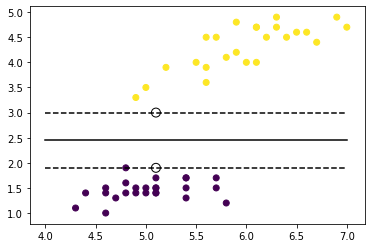

In [13]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 80, facecolors = 'none', edgecolors = 'k')

Xp = np.column_stack((datap['SepalLengthCm'], datap['PetalLengthCm']))
y = clf.predict(Xp)

m = {'Iris-setosa': 0,'Iris-versicolor': 1}
y = [m[item] for item in y]

plt.scatter(Xp[:, 0], Xp[:, 1], c = y, marker = 'o')

plt.show()